In [0]:
import datetime
import io  

import pandas as pd
import numpy as np
from scipy import stats
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,16)

In [0]:
from google.colab import files
import io 

#uploaded = files.upload()


In [0]:
df = pd.read_csv('raw.csv')

In [9]:
df.head(10)

,SerialNumber,Leave,ActionYear,WorkDurationYear,CountLoan,Avg_MonthPerLoan,HireType,HireSourceGroup,WorkDurationYear.1,Avg_TotalAbsensePerYear,...,EduBranch_ENG_OTHER,EduBranch_ENG_PET_CHEM,EduBranch_Finance,EduBranch_Languages,EduBranch_Law,EduBranch_Other,EduBranch_Science,EduBranch_Social,Max_EduInstituteGroup,NumYear_SinceLastEdu
0,4,1,2000,39.0,NaN,NaN,NaN,NaN,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0
1,5,1,2000,39.0,NaN,NaN,NaN,NaN,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UNIV,40.0
2,6,1,2000,38.0,NaN,NaN,NaN,NaN,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,47.0
3,7,1,2000,38.0,NaN,NaN,NaN,NaN,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,SCHL,39.0
4,10,1,2000,38.0,NaN,NaN,NaN,NaN,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,38.0
5,13,1,2005,41.0,NaN,NaN,NaN,NaN,41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,43.0
6,14,1,2001,37.0,NaN,NaN,NaN,NaN,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,38.0
7,17,1,2000,36.0,NaN,NaN,NaN,NaN,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,UNIV,11.0
8,20,1,2000,35.0,NaN,NaN,NaN,NaN,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UNIV,36.0
9,21,1,2001,36.0,NaN,NaN,NaN,NaN,36.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,UNIV,33.0


In [10]:
df.describe(include = 'all')
print(df.shape)
df.info()

(4591, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591 entries, 0 to 4590
Data columns (total 34 columns):
SerialNumber                     4591 non-null int64
Leave                            4591 non-null int64
ActionYear                       4591 non-null int64
WorkDurationYear                 4589 non-null float64
CountLoan                        1347 non-null float64
Avg_MonthPerLoan                 1347 non-null float64
HireType                         2264 non-null object
HireSourceGroup                  2253 non-null object
WorkDurationYear.1               4589 non-null float64
Avg_TotalAbsensePerYear          4585 non-null float64
Avg_NumDaysPerAbsense            3071 non-null float64
TotalEduAllowance                574 non-null float64
NumYear_SinceLastEduAllowance    574 non-null float64
TotalEduAttend                   4423 non-null float64
MaxEduDegreeLevel                4423 non-null float64
EduBranch_BUSINESS               4423 non-null float64
EduBranch_CH

In [11]:
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591 entries, 0 to 4590
Data columns (total 34 columns):
SerialNumber                     4591 non-null int64
Leave                            4591 non-null int64
ActionYear                       4591 non-null int64
WorkDurationYear                 4589 non-null float64
CountLoan                        1347 non-null float64
Avg_MonthPerLoan                 1347 non-null float64
HireType                         2264 non-null object
HireSourceGroup                  2253 non-null object
WorkDurationYear.1               4589 non-null float64
Avg_TotalAbsensePerYear          4585 non-null float64
Avg_NumDaysPerAbsense            3071 non-null float64
TotalEduAllowance                574 non-null float64
NumYear_SinceLastEduAllowance    574 non-null float64
TotalEduAttend                   4423 non-null float64
MaxEduDegreeLevel                4423 non-null float64
EduBranch_BUSINESS               4423 non-null float64
EduBranch_CHEM         

SerialNumber                        0
Leave                               0
ActionYear                          0
WorkDurationYear                    2
CountLoan                        3244
Avg_MonthPerLoan                 3244
HireType                         2327
HireSourceGroup                  2338
WorkDurationYear.1                  2
Avg_TotalAbsensePerYear             6
Avg_NumDaysPerAbsense            1520
TotalEduAllowance                4017
NumYear_SinceLastEduAllowance    4017
TotalEduAttend                    168
MaxEduDegreeLevel                 168
EduBranch_BUSINESS                168
EduBranch_CHEM                    168
EduBranch_COM                     168
EduBranch_EDU                     168
EduBranch_ENG_CHEM                168
EduBranch_ENG_CIVIL               168
EduBranch_ENG_COM_ELEC            168
EduBranch_ENG_ENV                 168
EduBranch_ENG_IND                 168
EduBranch_ENG_OTHER               168
EduBranch_ENG_PET_CHEM            168
EduBranch_Fi

## Cleansing -- Numeric Variable (More than 350 missing value)

3244

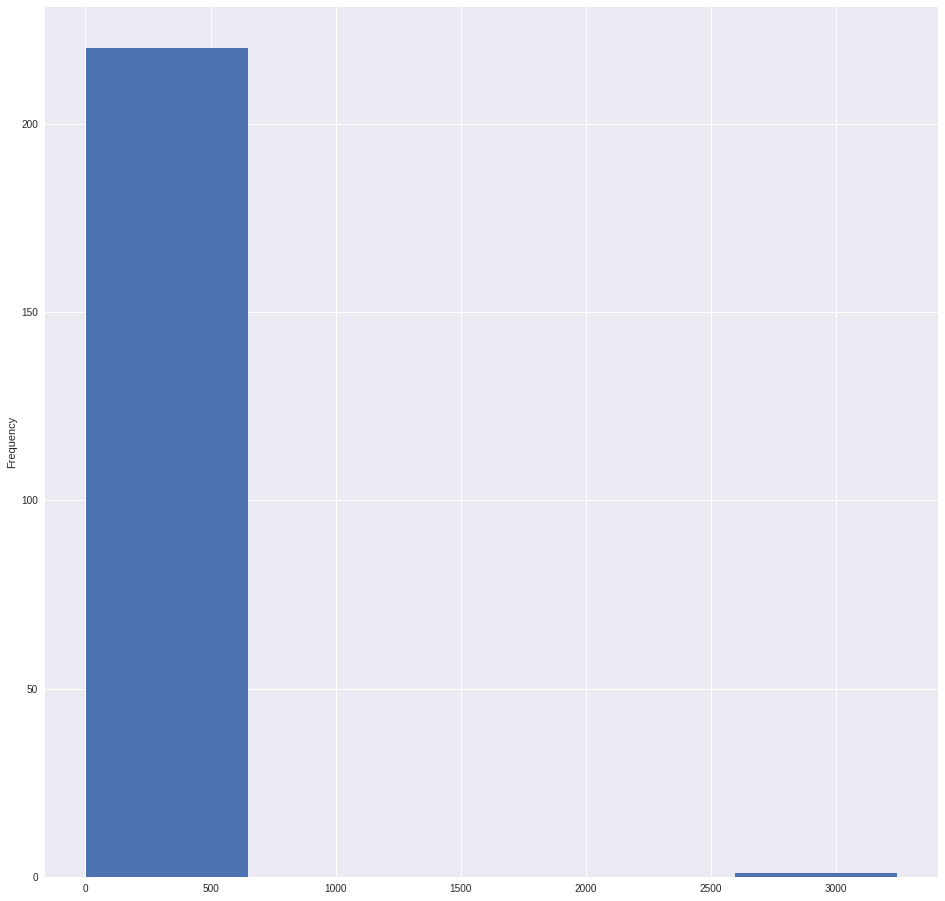

In [12]:
df['Avg_MonthPerLoan'].fillna('Missing').value_counts().plot.hist(bins=5, alpha=1)
df['Avg_MonthPerLoan'].isnull().sum()

3244

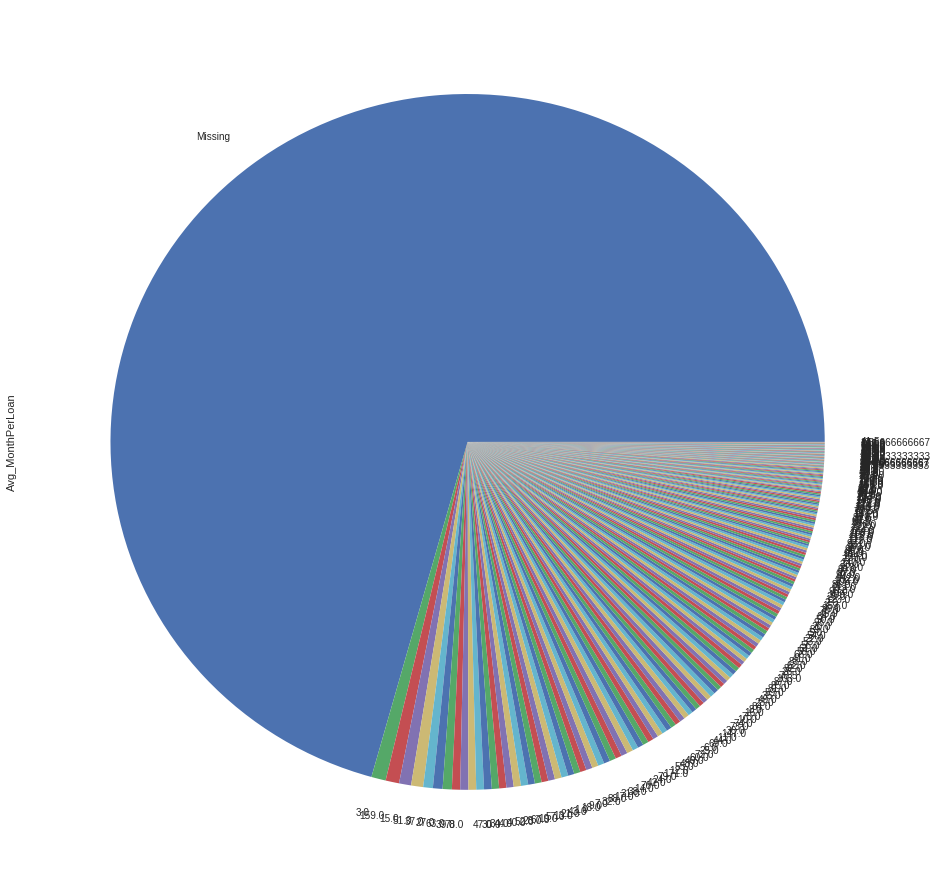

In [13]:
df['Avg_MonthPerLoan'].fillna('Missing').value_counts().plot(kind='pie')
df['Avg_MonthPerLoan'].isnull().sum()

3244

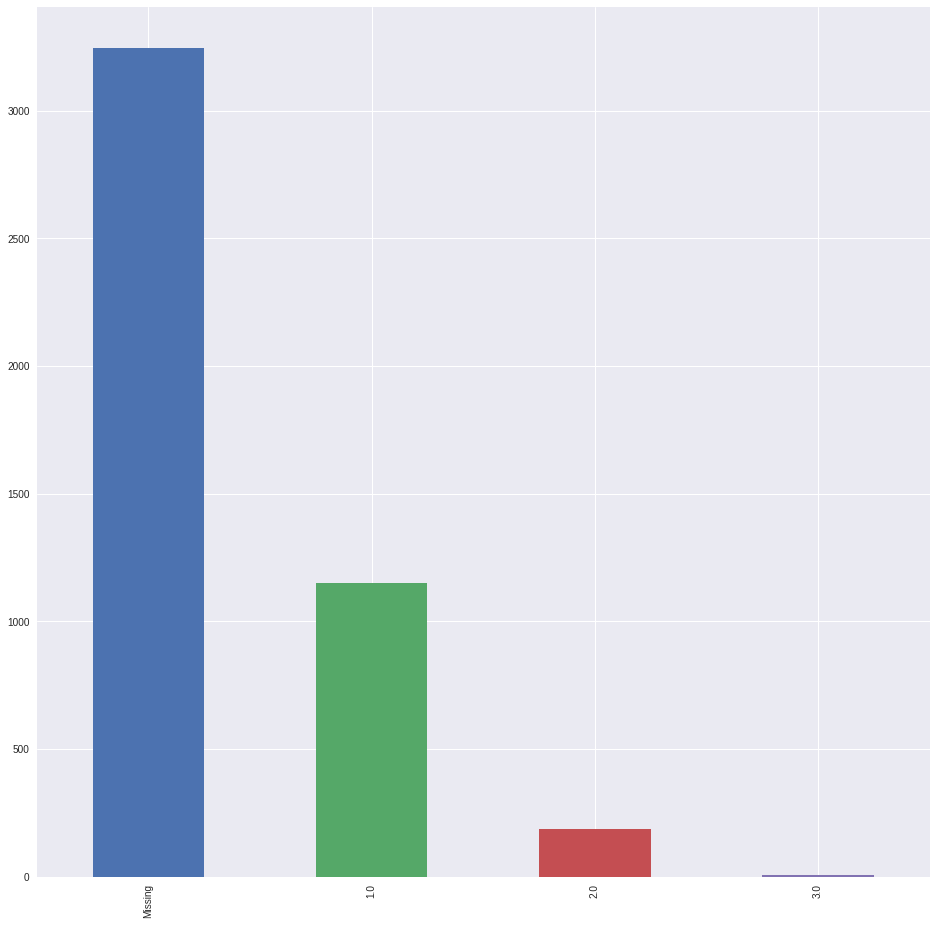

In [14]:
df['CountLoan'].fillna('Missing').value_counts().plot(kind='bar')
df['CountLoan'].isnull().sum()

4017

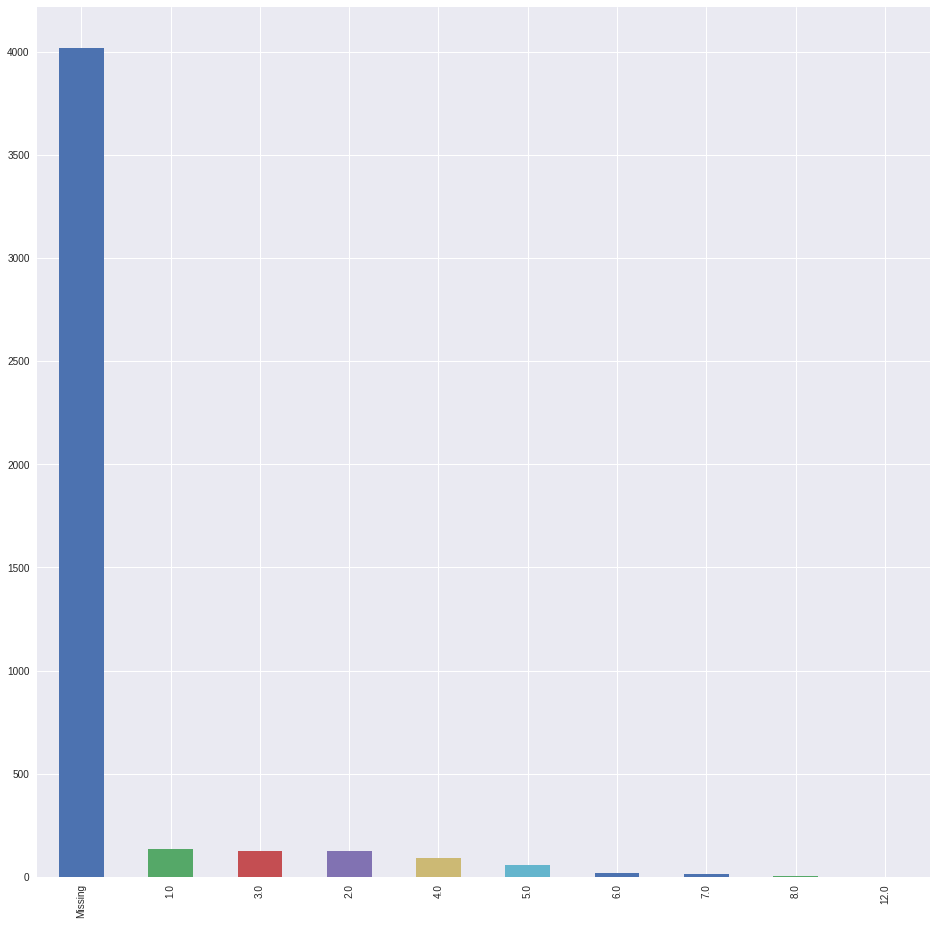

In [15]:
df['TotalEduAllowance'].fillna('Missing').value_counts().plot(kind='bar')
df['TotalEduAllowance'].isnull().sum()

4017

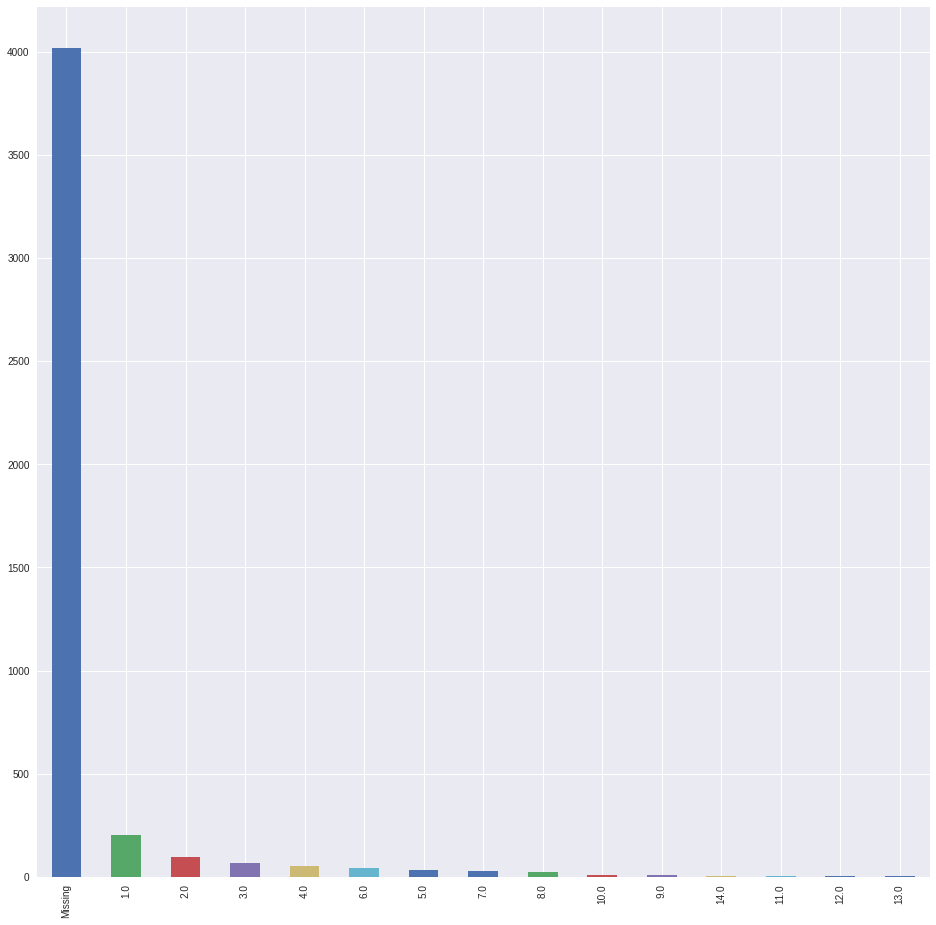

In [16]:
df['NumYear_SinceLastEduAllowance'].fillna('Missing').value_counts().plot(kind='bar')
df['NumYear_SinceLastEduAllowance'].isnull().sum()

## Cleansing -- Numeric Variable (Less than 50 missing value)

168

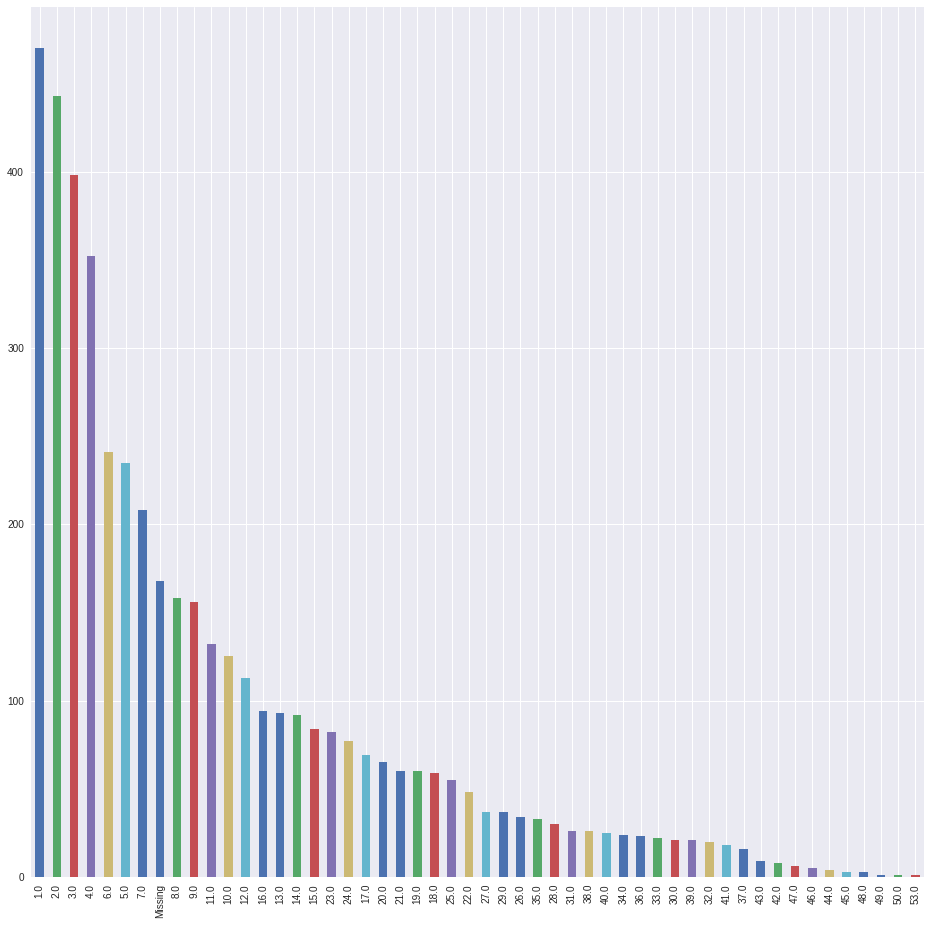

In [17]:
df['NumYear_SinceLastEdu'].fillna('Missing').value_counts().plot(kind='bar')
df['NumYear_SinceLastEdu'].isnull().sum()

168

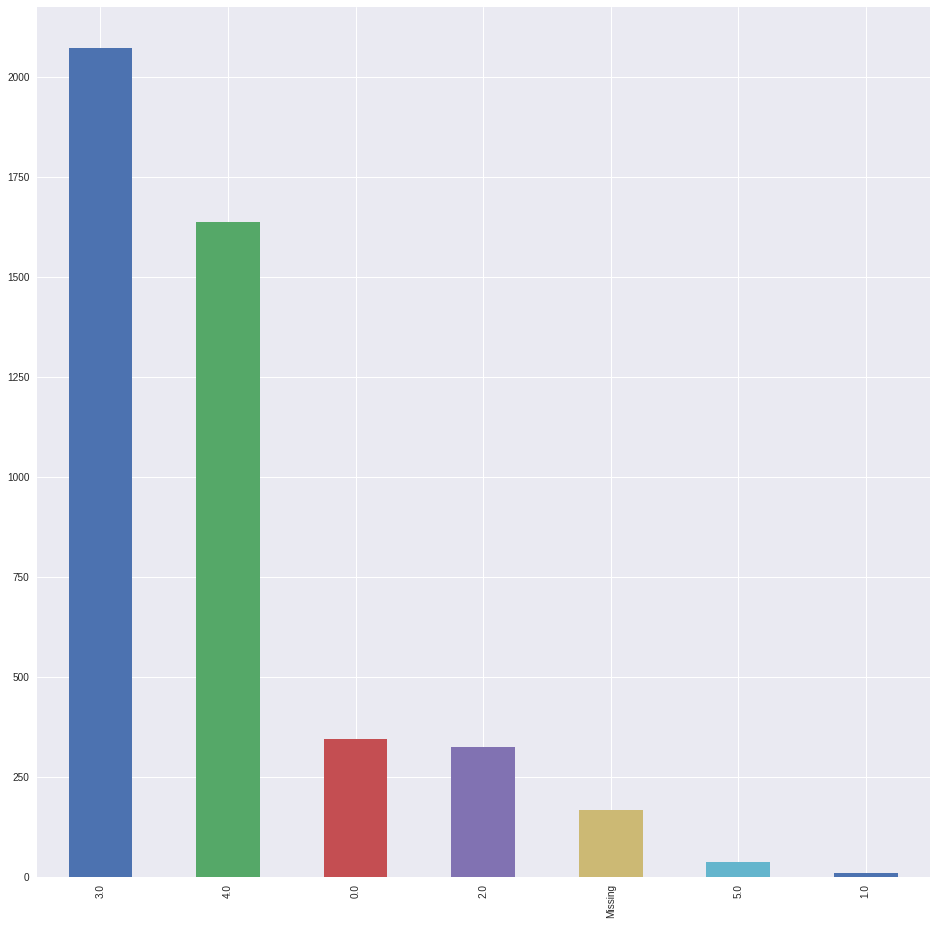

In [18]:
df['MaxEduDegreeLevel'].fillna('Missing').value_counts().plot(kind='bar')
df['MaxEduDegreeLevel'].isnull().sum()

168

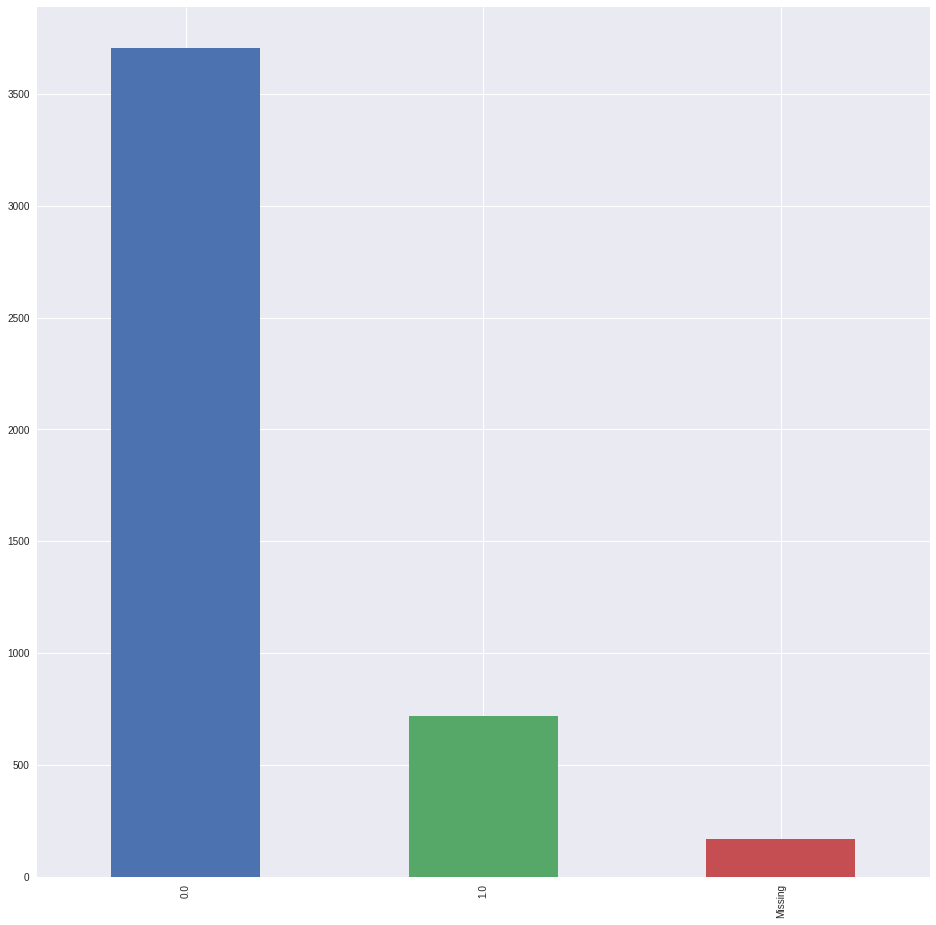

In [19]:
df['EduBranch_Other'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_Other'].isnull().sum()

168

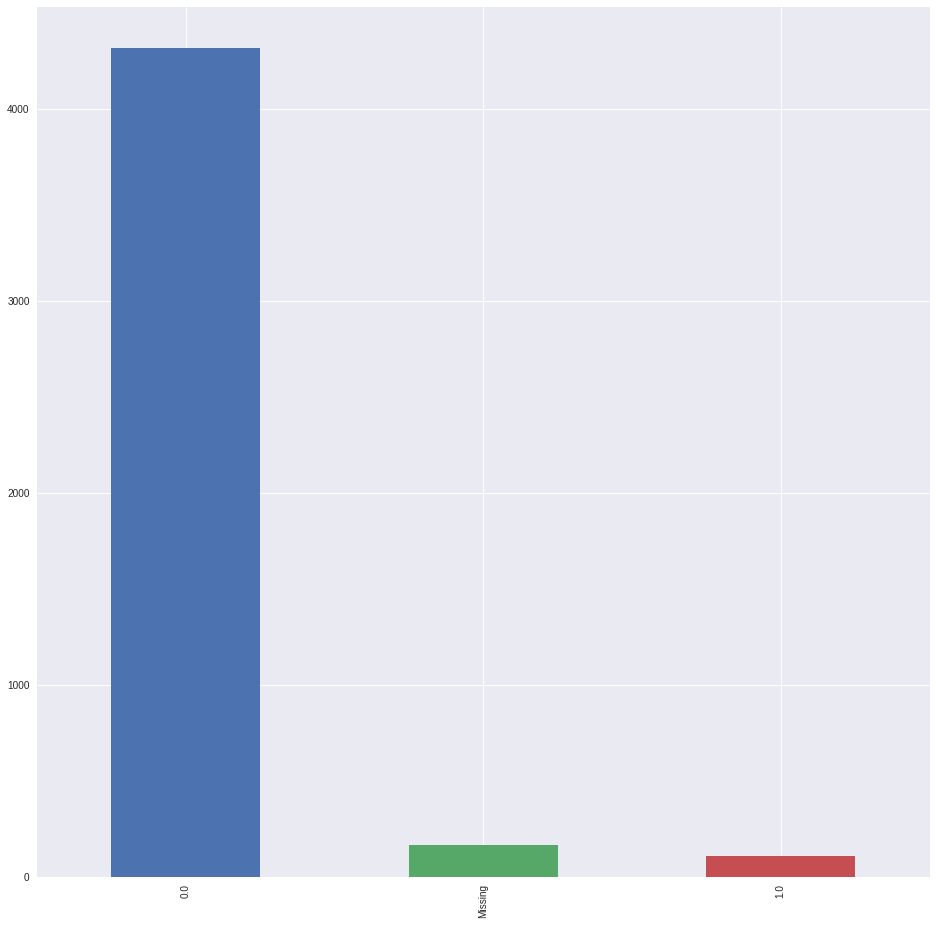

In [20]:
df['EduBranch_EDU'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_EDU'].isnull().sum()

168

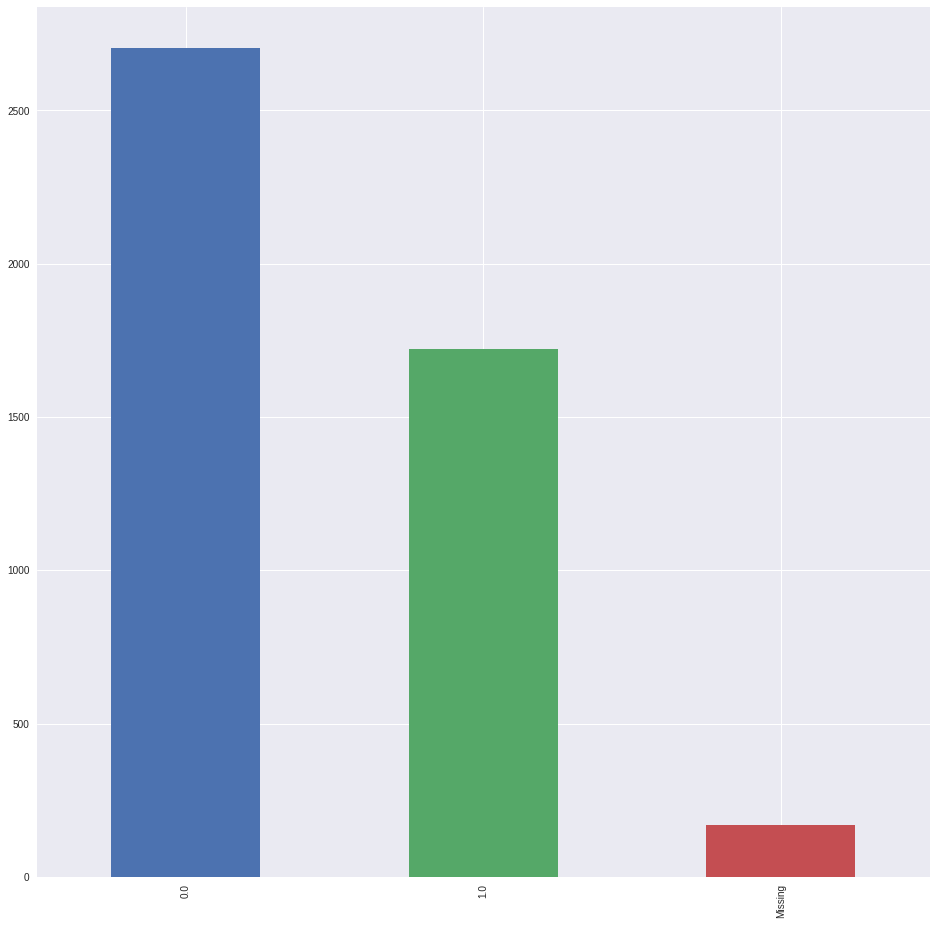

In [21]:
df['EduBranch_BUSINESS'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_BUSINESS'].isnull().sum()

168

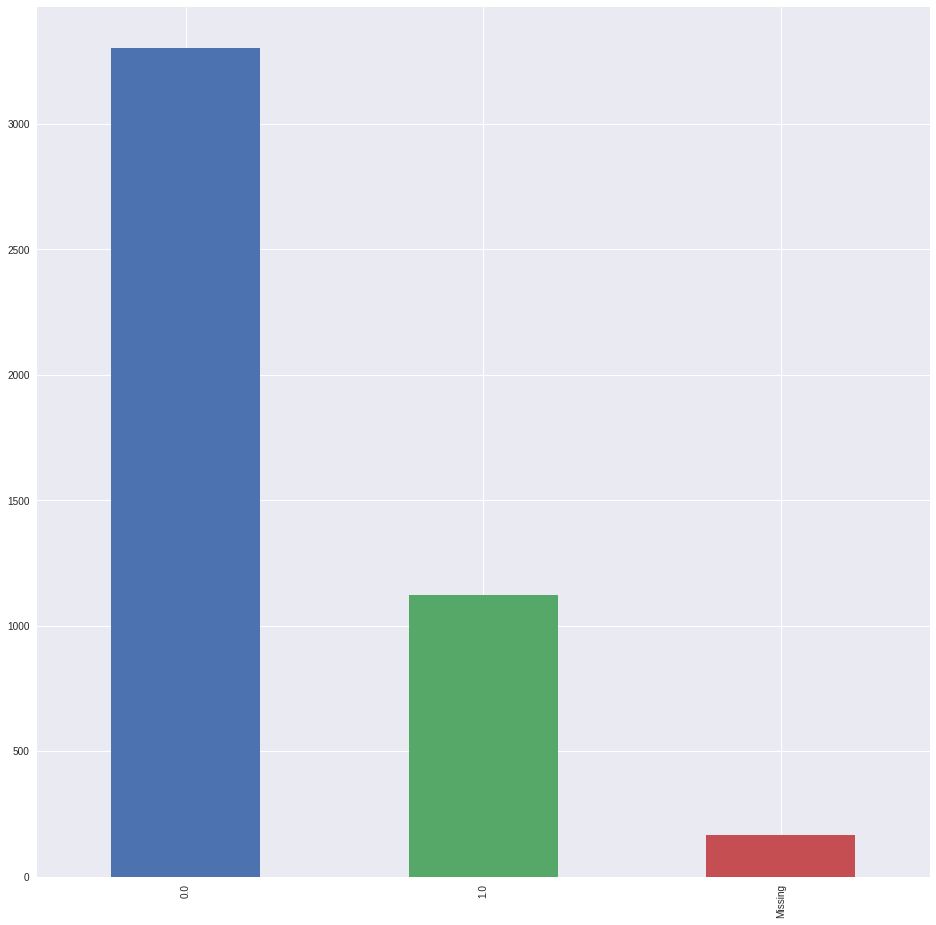

In [22]:
df['EduBranch_Finance'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_Finance'].isnull().sum()

168

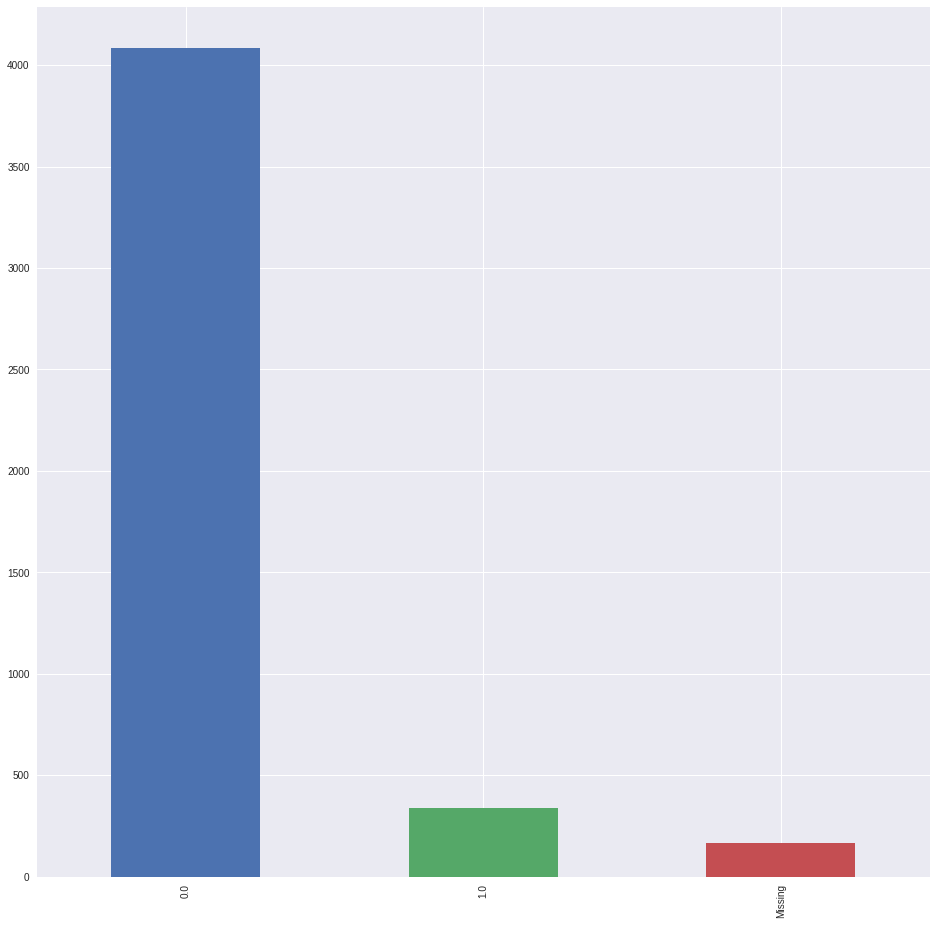

In [23]:
df['EduBranch_ENG_IND'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_ENG_IND'].isnull().sum()

168

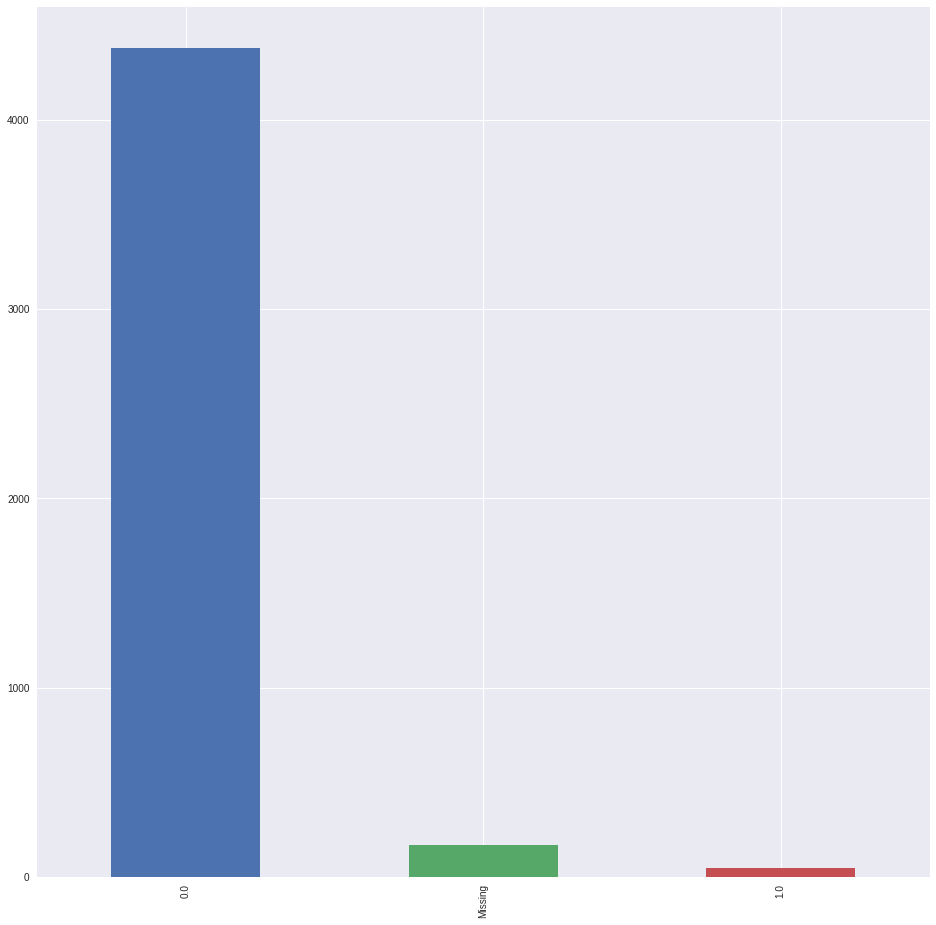

In [24]:
df['EduBranch_Law'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_Law'].isnull().sum()

168

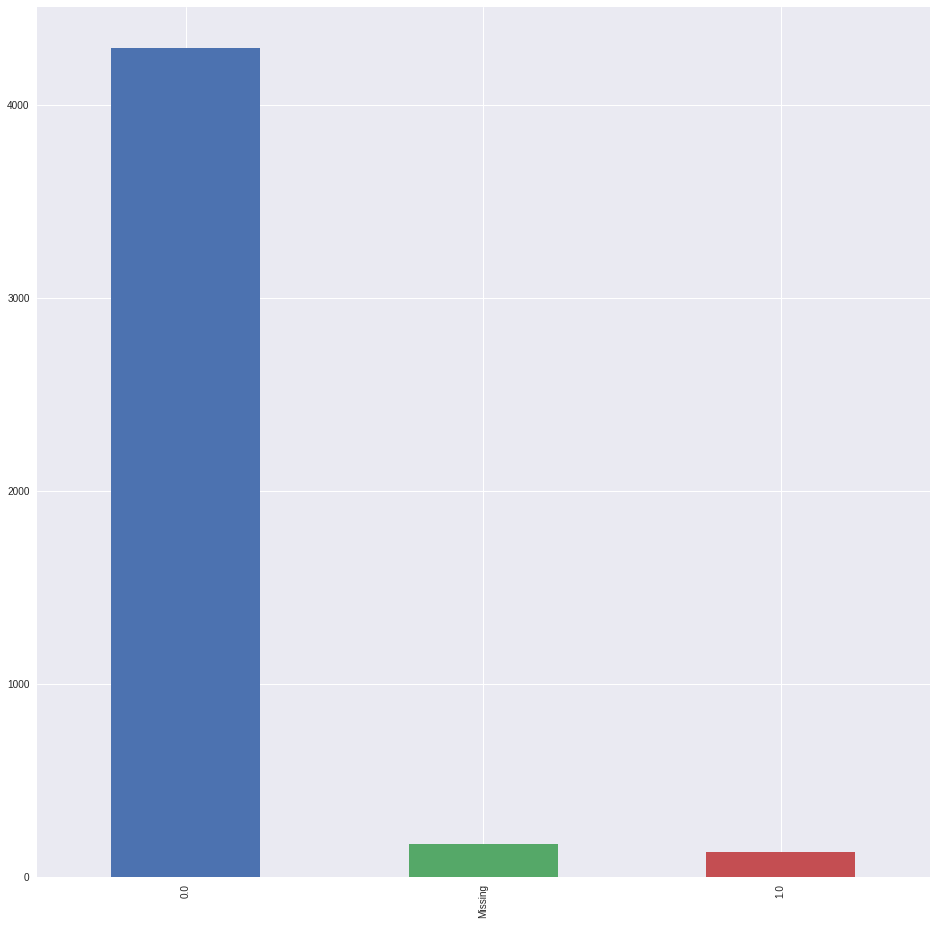

In [25]:
df['EduBranch_COM'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_COM'].isnull().sum()

168

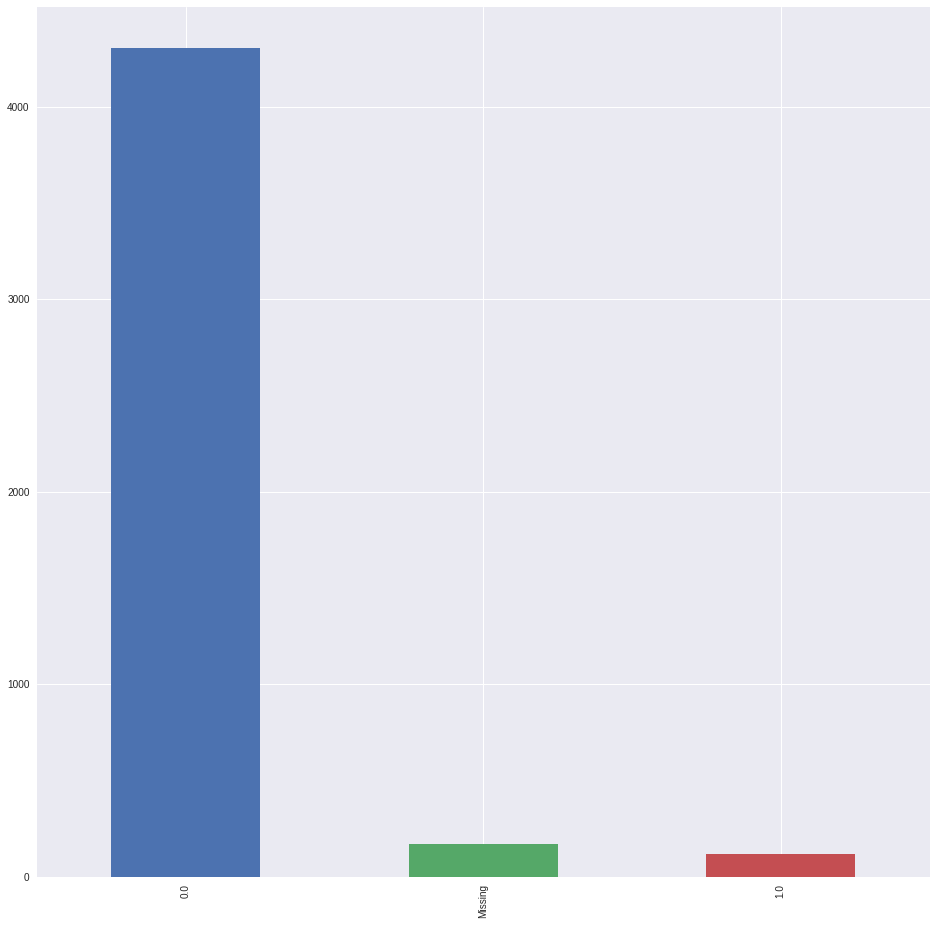

In [26]:
df['EduBranch_Science'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_Science'].isnull().sum()

168

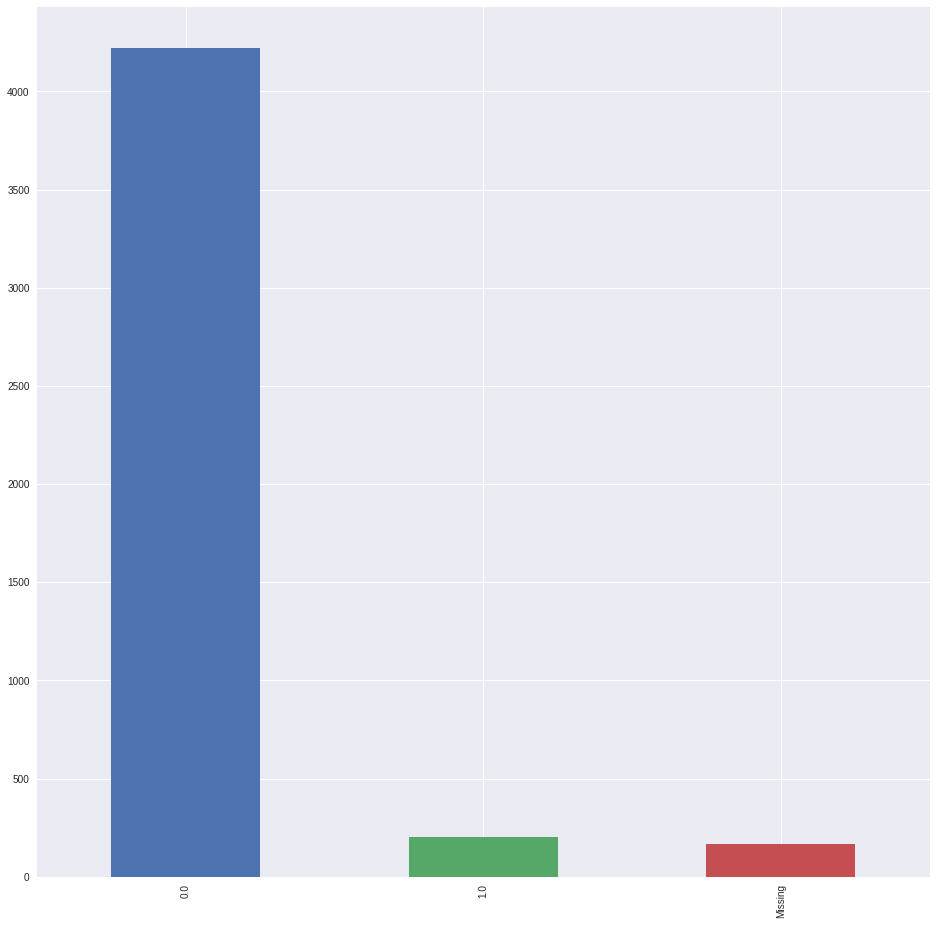

In [27]:
df['EduBranch_ENG_PET_CHEM'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_ENG_PET_CHEM'].isnull().sum()

168

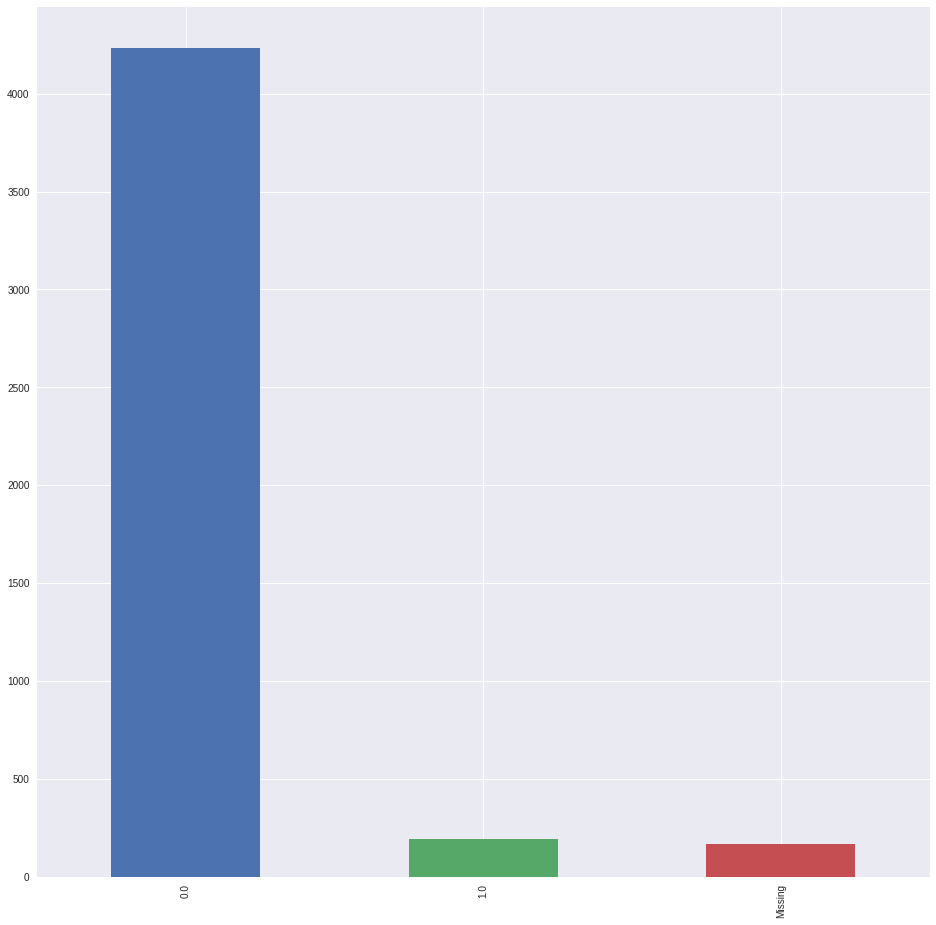

In [28]:
df['EduBranch_ENG_COM_ELEC'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_ENG_COM_ELEC'].isnull().sum()

168

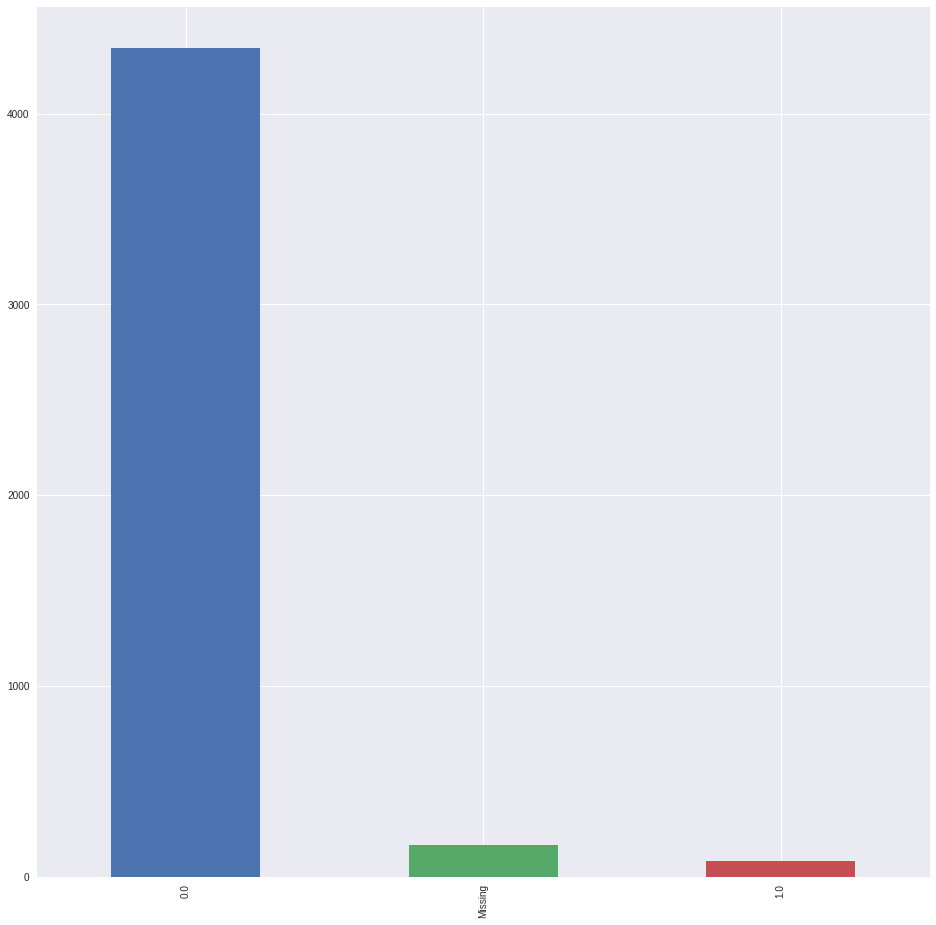

In [29]:
df['EduBranch_CHEM'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_CHEM'].isnull().sum()

168

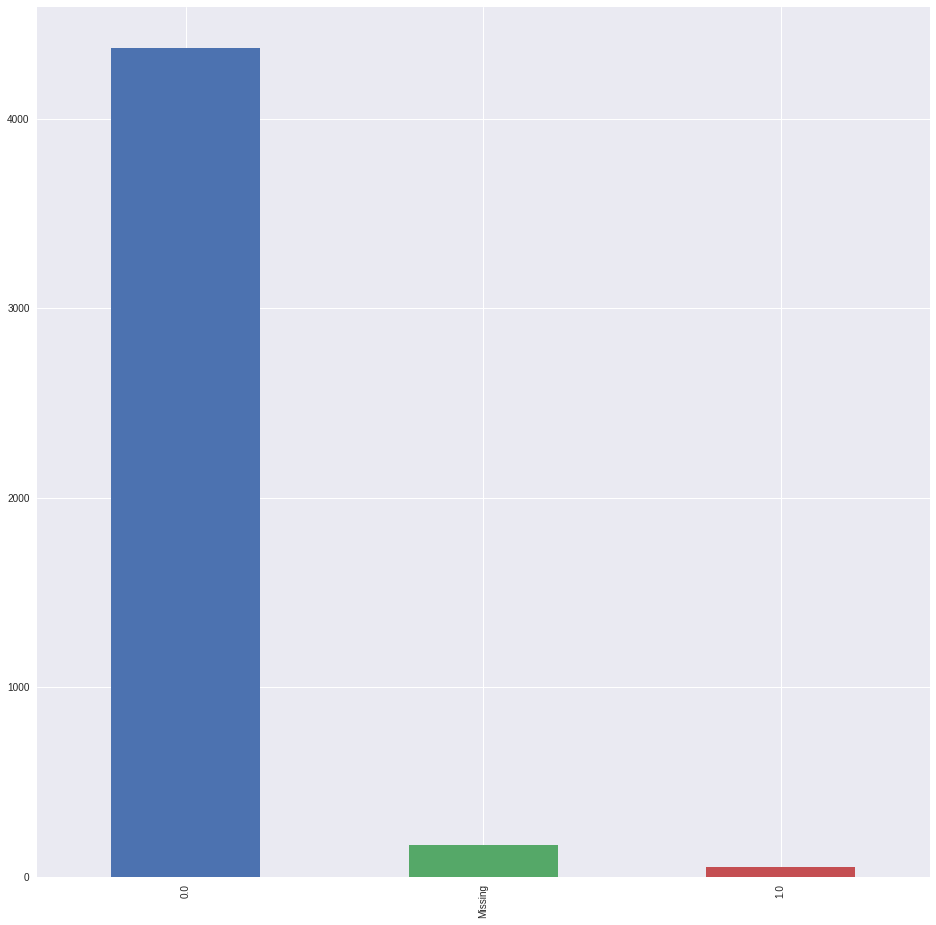

In [30]:
df['EduBranch_ENG_CIVIL'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_ENG_CIVIL'].isnull().sum()

168

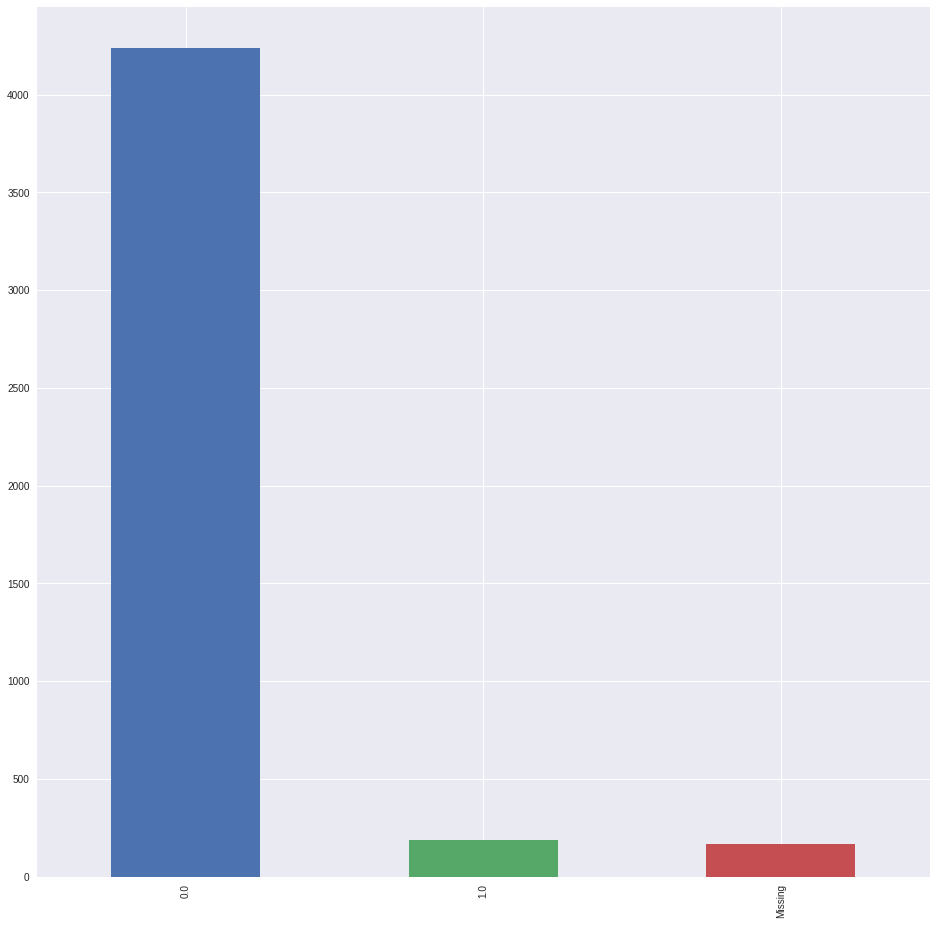

In [31]:
df['EduBranch_Social'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_Social'].isnull().sum()

168

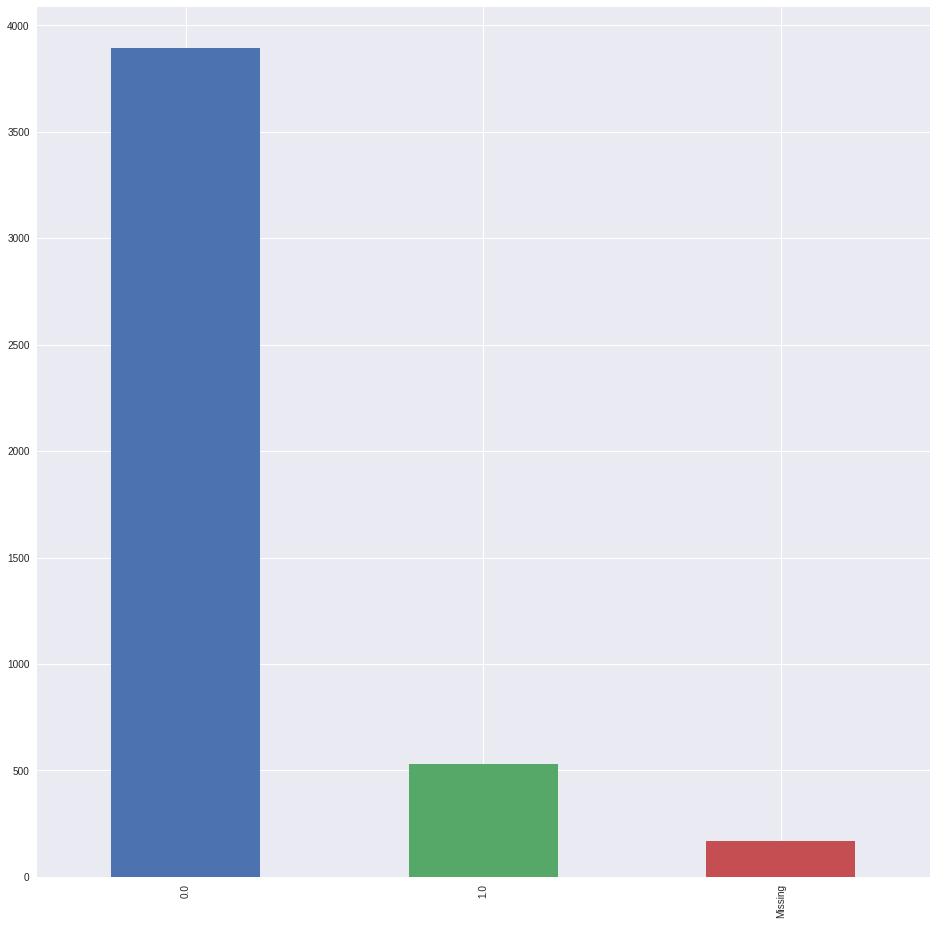

In [32]:
df['EduBranch_Languages'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_Languages'].isnull().sum()

168

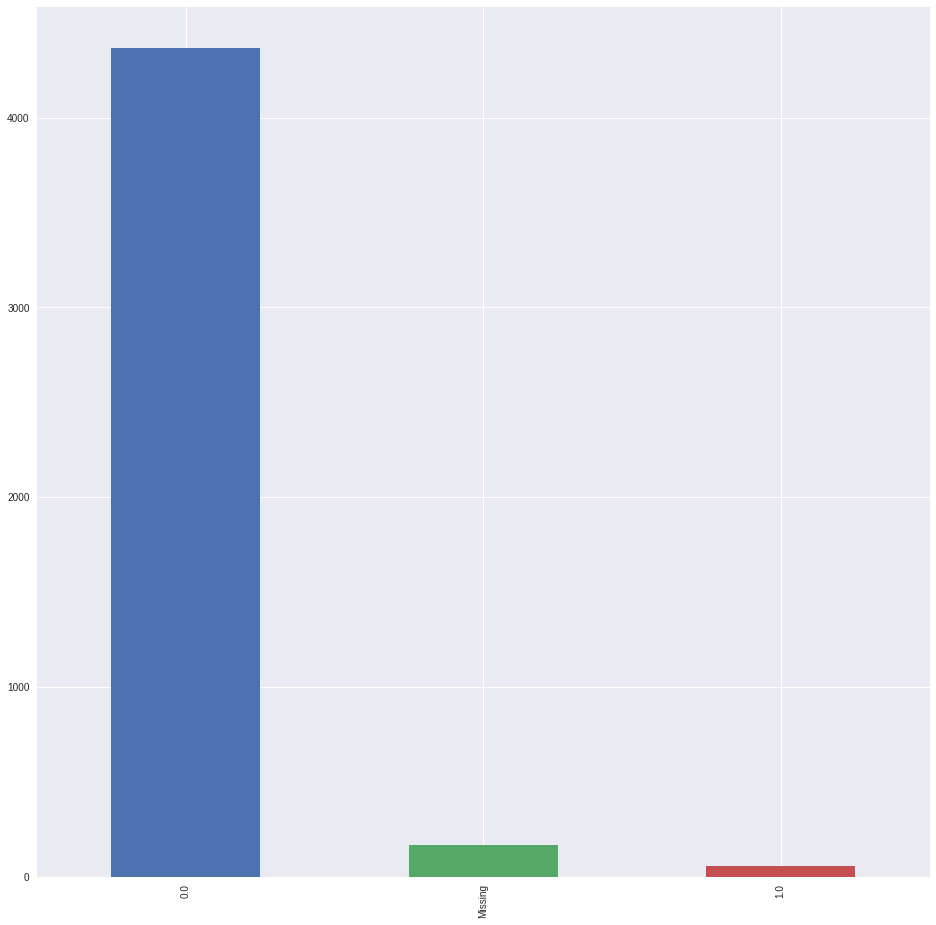

In [33]:
df['EduBranch_ENG_OTHER'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_ENG_OTHER'].isnull().sum()

168

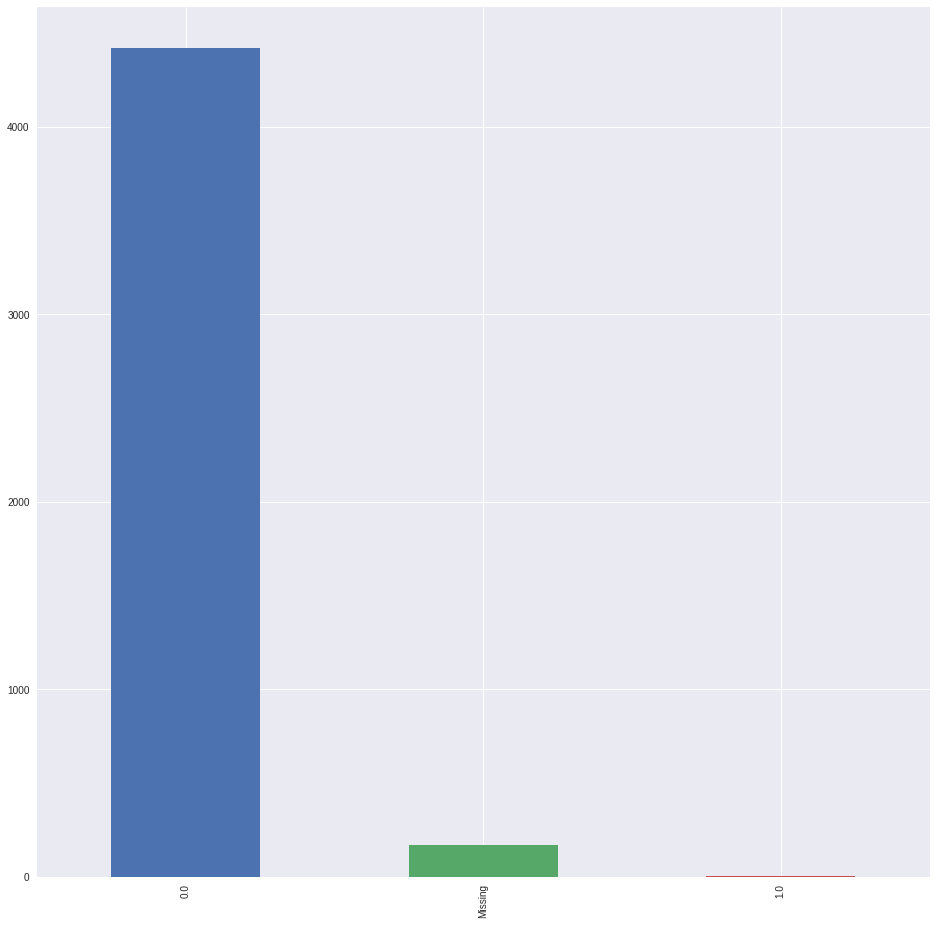

In [34]:
df['EduBranch_ENG_CHEM'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_ENG_CHEM'].isnull().sum()

168

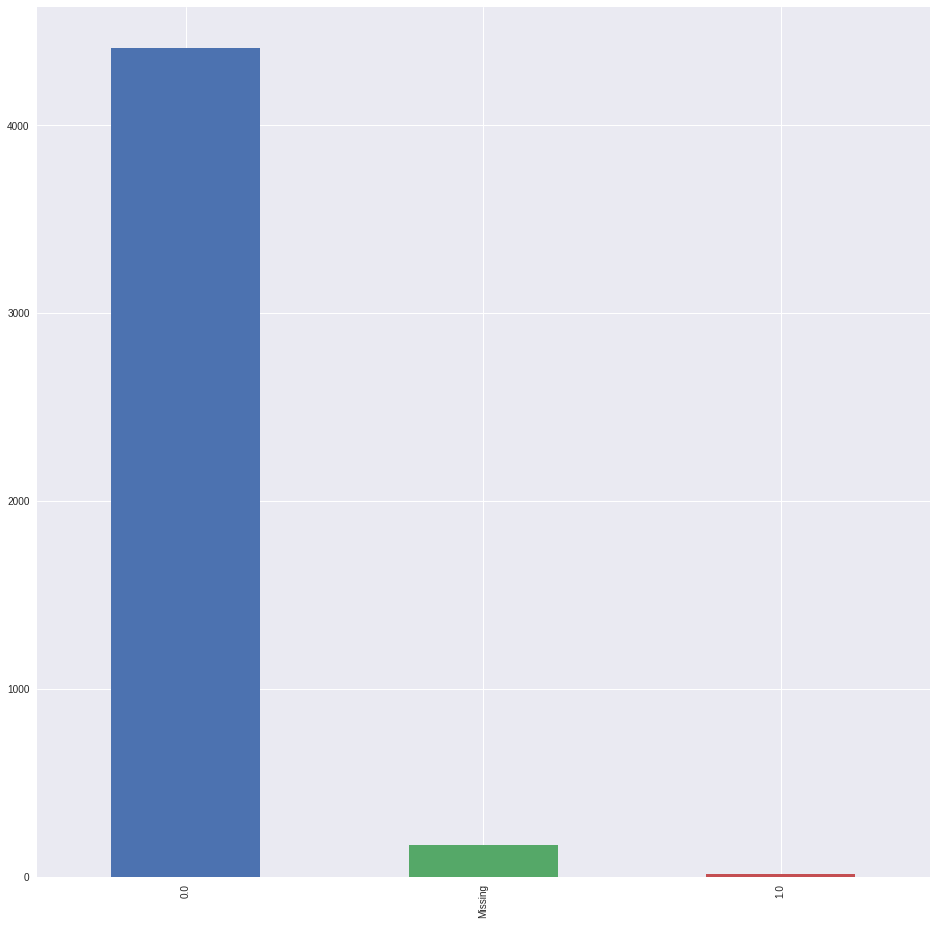

In [35]:
df['EduBranch_ENG_ENV'].fillna('Missing').value_counts().plot(kind='bar')
df['EduBranch_ENG_ENV'].isnull().sum()

2

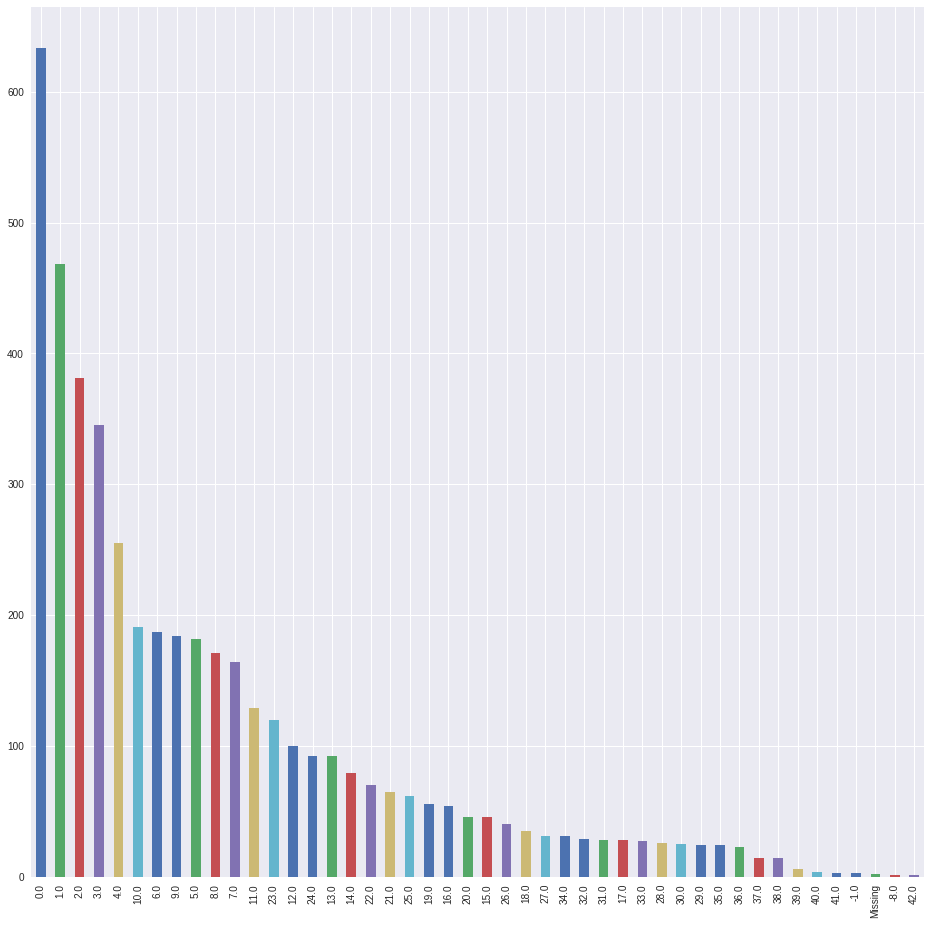

In [36]:
df['WorkDurationYear.1'].fillna('Missing').value_counts().plot(kind='bar')
df['WorkDurationYear.1'].isnull().sum()

## Cleansing -- Object Variable

EduInstituteGroup have 388 missing variable. \

HireTypeGroup have 2327 missing variable. \

HireSourceGroup have 2338 missing variable.

513

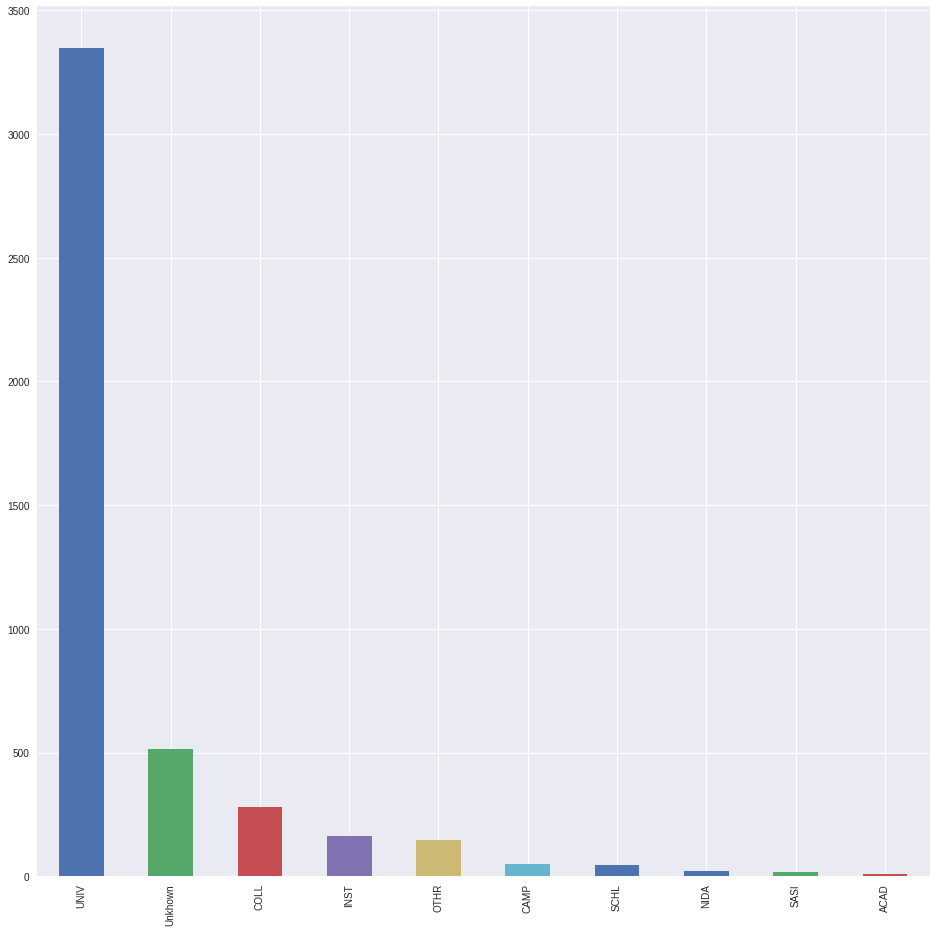

In [37]:
df['Max_EduInstituteGroup'].fillna('Unkhown').value_counts().plot(kind='bar')
df['Max_EduInstituteGroup'].isnull().sum()

2327

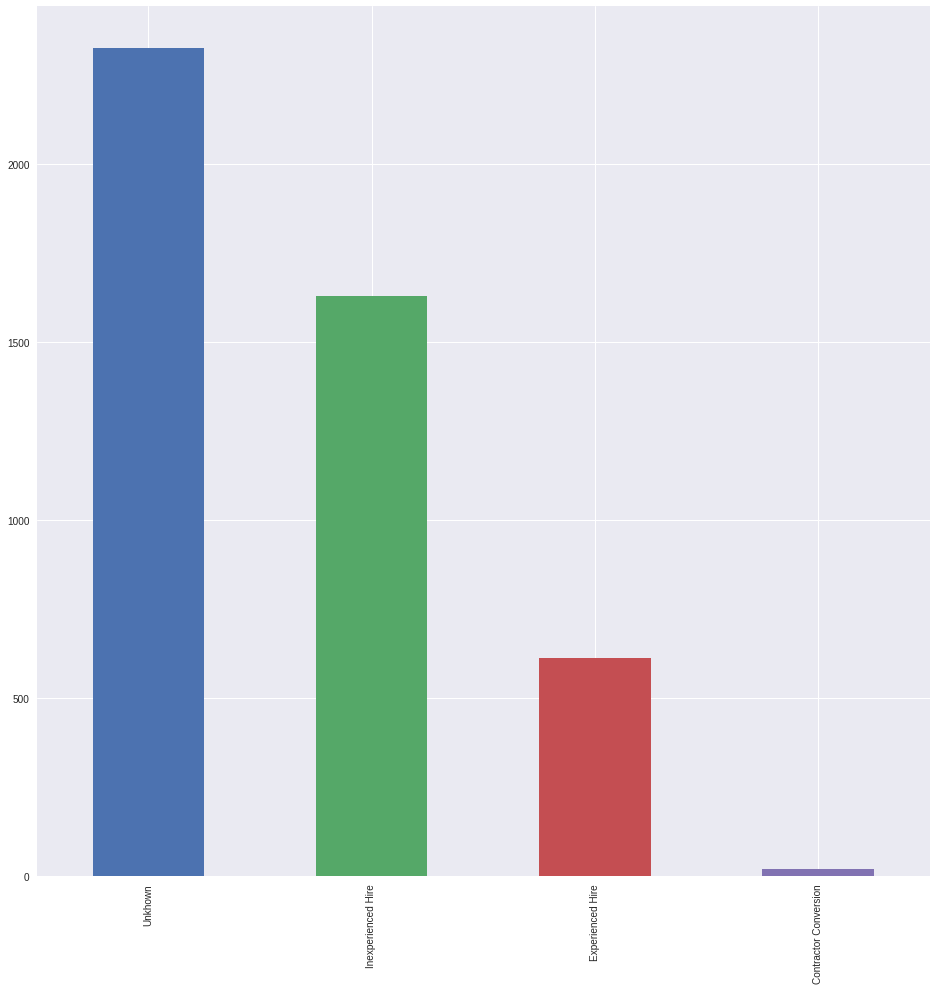

In [38]:
df['HireType'].fillna('Unkhown').value_counts().plot(kind='bar')
df['HireType'].isnull().sum()

2338

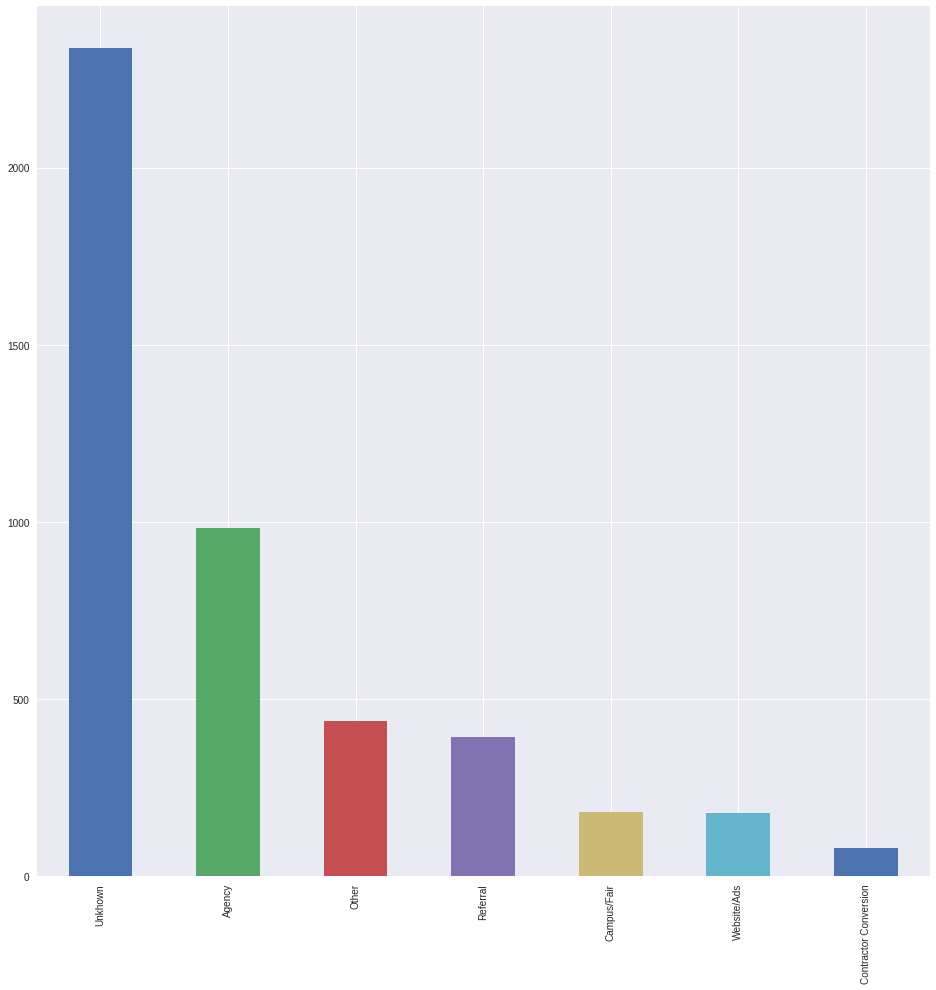

In [39]:
df['HireSourceGroup'].fillna('Unkhown').value_counts().plot(kind='bar')
df['HireSourceGroup'].isnull().sum()

## Replace missing value

In [40]:
df = pd.read_csv('raw.csv')

df.shape

(4591, 34)

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591 entries, 0 to 4590
Data columns (total 34 columns):
SerialNumber                     4591 non-null int64
Leave                            4591 non-null int64
ActionYear                       4591 non-null int64
WorkDurationYear                 4589 non-null float64
CountLoan                        1347 non-null float64
Avg_MonthPerLoan                 1347 non-null float64
HireType                         2264 non-null object
HireSourceGroup                  2253 non-null object
WorkDurationYear.1               4589 non-null float64
Avg_TotalAbsensePerYear          4585 non-null float64
Avg_NumDaysPerAbsense            3071 non-null float64
TotalEduAllowance                574 non-null float64
NumYear_SinceLastEduAllowance    574 non-null float64
TotalEduAttend                   4423 non-null float64
MaxEduDegreeLevel                4423 non-null float64
EduBranch_BUSINESS               4423 non-null float64
EduBranch_CHEM         

In [42]:
df.isnull().sum() # check missing value 

SerialNumber                        0
Leave                               0
ActionYear                          0
WorkDurationYear                    2
CountLoan                        3244
Avg_MonthPerLoan                 3244
HireType                         2327
HireSourceGroup                  2338
WorkDurationYear.1                  2
Avg_TotalAbsensePerYear             6
Avg_NumDaysPerAbsense            1520
TotalEduAllowance                4017
NumYear_SinceLastEduAllowance    4017
TotalEduAttend                    168
MaxEduDegreeLevel                 168
EduBranch_BUSINESS                168
EduBranch_CHEM                    168
EduBranch_COM                     168
EduBranch_EDU                     168
EduBranch_ENG_CHEM                168
EduBranch_ENG_CIVIL               168
EduBranch_ENG_COM_ELEC            168
EduBranch_ENG_ENV                 168
EduBranch_ENG_IND                 168
EduBranch_ENG_OTHER               168
EduBranch_ENG_PET_CHEM            168
EduBranch_Fi

In [43]:
df.head()

,SerialNumber,Leave,ActionYear,WorkDurationYear,CountLoan,Avg_MonthPerLoan,HireType,HireSourceGroup,WorkDurationYear.1,Avg_TotalAbsensePerYear,...,EduBranch_ENG_OTHER,EduBranch_ENG_PET_CHEM,EduBranch_Finance,EduBranch_Languages,EduBranch_Law,EduBranch_Other,EduBranch_Science,EduBranch_Social,Max_EduInstituteGroup,NumYear_SinceLastEdu
0,4,1,2000,39.0,NaN,NaN,NaN,NaN,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0
1,5,1,2000,39.0,NaN,NaN,NaN,NaN,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UNIV,40.0
2,6,1,2000,38.0,NaN,NaN,NaN,NaN,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,47.0
3,7,1,2000,38.0,NaN,NaN,NaN,NaN,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,SCHL,39.0
4,10,1,2000,38.0,NaN,NaN,NaN,NaN,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,38.0


## Impute Missing Value

In [44]:
df['Max_EduInstituteGroup'] = df['Max_EduInstituteGroup'].fillna('Unknown')
df['HireType'] = df['HireType'].fillna('Unknown')
df['HireSourceGroup'] = df['HireSourceGroup'].fillna('Unknown')

df = df[df > 0]
df = df.fillna(0)

df.shape

(4591, 34)

In [45]:
df.head(10)

,SerialNumber,Leave,ActionYear,WorkDurationYear,CountLoan,Avg_MonthPerLoan,HireType,HireSourceGroup,WorkDurationYear.1,Avg_TotalAbsensePerYear,...,EduBranch_ENG_OTHER,EduBranch_ENG_PET_CHEM,EduBranch_Finance,EduBranch_Languages,EduBranch_Law,EduBranch_Other,EduBranch_Science,EduBranch_Social,Max_EduInstituteGroup,NumYear_SinceLastEdu
0,4,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,41.0
1,5,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UNIV,40.0
2,6,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Unknown,47.0
3,7,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,SCHL,39.0
4,10,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,38.0
5,13,1.0,2005,41.0,0.0,0.0,Unknown,Unknown,41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Unknown,43.0
6,14,1.0,2001,37.0,0.0,0.0,Unknown,Unknown,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Unknown,38.0
7,17,1.0,2000,36.0,0.0,0.0,Unknown,Unknown,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,UNIV,11.0
8,20,1.0,2000,35.0,0.0,0.0,Unknown,Unknown,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UNIV,36.0
9,21,1.0,2001,36.0,0.0,0.0,Unknown,Unknown,36.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,UNIV,33.0


In [46]:
df.isnull().sum() # check missing value again

SerialNumber                     0
Leave                            0
ActionYear                       0
WorkDurationYear                 0
CountLoan                        0
Avg_MonthPerLoan                 0
HireType                         0
HireSourceGroup                  0
WorkDurationYear.1               0
Avg_TotalAbsensePerYear          0
Avg_NumDaysPerAbsense            0
TotalEduAllowance                0
NumYear_SinceLastEduAllowance    0
TotalEduAttend                   0
MaxEduDegreeLevel                0
EduBranch_BUSINESS               0
EduBranch_CHEM                   0
EduBranch_COM                    0
EduBranch_EDU                    0
EduBranch_ENG_CHEM               0
EduBranch_ENG_CIVIL              0
EduBranch_ENG_COM_ELEC           0
EduBranch_ENG_ENV                0
EduBranch_ENG_IND                0
EduBranch_ENG_OTHER              0
EduBranch_ENG_PET_CHEM           0
EduBranch_Finance                0
EduBranch_Languages              0
EduBranch_Law       

## Feature Selection

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [48]:
print(type(df.shape[1]))
n = df.shape[1]
print(n)

<type 'int'>
34


In [0]:
col_types = df.dtypes.drop(['Leave','ActionYear']).rename('dtype').reset_index()

In [0]:
def get_num_cols(df):
  col_types = df.dtypes.drop(['Leave','ActionYear']).rename('dtype').reset_index()
  return col_types[col_types.dtype.isin([np.dtype('int64'), np.dtype('float64')])]['index'].tolist()

def get_cat_cols(df):
  col_types = df.dtypes.drop(['Leave','ActionYear']).rename('dtype').reset_index()
  return col_types[col_types.dtype == np.dtype('O')]['index'].tolist()

  

In [51]:
get_num_cols(df)

['SerialNumber',
 'WorkDurationYear',
 'CountLoan',
 'Avg_MonthPerLoan',
 'WorkDurationYear.1',
 'Avg_TotalAbsensePerYear',
 'Avg_NumDaysPerAbsense',
 'TotalEduAllowance',
 'NumYear_SinceLastEduAllowance',
 'TotalEduAttend',
 'MaxEduDegreeLevel',
 'EduBranch_BUSINESS',
 'EduBranch_CHEM',
 'EduBranch_COM',
 'EduBranch_EDU',
 'EduBranch_ENG_CHEM',
 'EduBranch_ENG_CIVIL',
 'EduBranch_ENG_COM_ELEC',
 'EduBranch_ENG_ENV',
 'EduBranch_ENG_IND',
 'EduBranch_ENG_OTHER',
 'EduBranch_ENG_PET_CHEM',
 'EduBranch_Finance',
 'EduBranch_Languages',
 'EduBranch_Law',
 'EduBranch_Other',
 'EduBranch_Science',
 'EduBranch_Social',
 'NumYear_SinceLastEdu']

In [52]:
lst_object = col_types[col_types.dtype == np.dtype('O')]['index'].tolist()
lst_object

['HireType', 'HireSourceGroup', 'Max_EduInstituteGroup']

In [53]:
lst_numeric = col_types[col_types.dtype.isin([np.dtype('int64'), np.dtype('float64')])]['index'].tolist()
lst_numeric

['SerialNumber',
 'WorkDurationYear',
 'CountLoan',
 'Avg_MonthPerLoan',
 'WorkDurationYear.1',
 'Avg_TotalAbsensePerYear',
 'Avg_NumDaysPerAbsense',
 'TotalEduAllowance',
 'NumYear_SinceLastEduAllowance',
 'TotalEduAttend',
 'MaxEduDegreeLevel',
 'EduBranch_BUSINESS',
 'EduBranch_CHEM',
 'EduBranch_COM',
 'EduBranch_EDU',
 'EduBranch_ENG_CHEM',
 'EduBranch_ENG_CIVIL',
 'EduBranch_ENG_COM_ELEC',
 'EduBranch_ENG_ENV',
 'EduBranch_ENG_IND',
 'EduBranch_ENG_OTHER',
 'EduBranch_ENG_PET_CHEM',
 'EduBranch_Finance',
 'EduBranch_Languages',
 'EduBranch_Law',
 'EduBranch_Other',
 'EduBranch_Science',
 'EduBranch_Social',
 'NumYear_SinceLastEdu']

In [54]:
df_only_object = df.filter(items=lst_object)
df_only_object.head()

,HireType,HireSourceGroup,Max_EduInstituteGroup
0,Unknown,Unknown,Unknown
1,Unknown,Unknown,UNIV
2,Unknown,Unknown,Unknown
3,Unknown,Unknown,SCHL
4,Unknown,Unknown,Unknown


In [55]:
df_only_numeric = df.filter(items=lst_numeric).drop('SerialNumber', axis=1)
df_only_numeric.head()

,WorkDurationYear,CountLoan,Avg_MonthPerLoan,WorkDurationYear.1,Avg_TotalAbsensePerYear,Avg_NumDaysPerAbsense,TotalEduAllowance,NumYear_SinceLastEduAllowance,TotalEduAttend,MaxEduDegreeLevel,...,EduBranch_ENG_IND,EduBranch_ENG_OTHER,EduBranch_ENG_PET_CHEM,EduBranch_Finance,EduBranch_Languages,EduBranch_Law,EduBranch_Other,EduBranch_Science,EduBranch_Social,NumYear_SinceLastEdu
0,39.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
1,39.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
2,38.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0
3,38.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0
4,38.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0


In [56]:
df_only_label = df.filter(items=['Leave'])
df_only_label.head()

,Leave
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [0]:
array_object = df_only_object.values
array_numeric = df_only_numeric.values
array_label = df_only_label.values

In [0]:
X = array_numeric[:, :]
y = array_label[:, :].astype(float)

In [59]:
X.shape

(4591, 28)

In [0]:
# feature extraction
X_new = SelectKBest(score_func=chi2, k='all').fit(X, y)

In [0]:
X_new_pavalues = X_new.pvalues_.tolist()

In [62]:
X_new.pvalues_ < 0.05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True])

In [0]:
selected = []
selected = [X_new.pvalues_ < 0.05]

selected = selected[0].tolist()

In [0]:
df_new = pd.DataFrame([df_only_numeric.columns.tolist(), X_new_pavalues, selected]).T.rename({0:'name', 1:'pvalue', 2:'selected'}, axis=1)

In [65]:
df_new

,name,pvalue,selected
0,WorkDurationYear,3.45649e-273,True
1,CountLoan,1.65382e-85,True
2,Avg_MonthPerLoan,0,True
3,WorkDurationYear.1,3.45649e-273,True
4,Avg_TotalAbsensePerYear,3.58683e-292,True
5,Avg_NumDaysPerAbsense,8.51826e-28,True
6,TotalEduAllowance,2.1183e-15,True
7,NumYear_SinceLastEduAllowance,1.15593e-72,True
8,TotalEduAttend,1.02694e-15,True
9,MaxEduDegreeLevel,0.120705,False


## Export selected variable

In [66]:
df_selected = df_new[ df_new['selected']==False ]
df_selected

,name,pvalue,selected
9,MaxEduDegreeLevel,0.120705,False
10,EduBranch_BUSINESS,0.593945,False
12,EduBranch_COM,0.060556,False
13,EduBranch_EDU,0.709441,False
14,EduBranch_ENG_CHEM,0.283862,False
15,EduBranch_ENG_CIVIL,0.0917016,False
16,EduBranch_ENG_COM_ELEC,0.622527,False
17,EduBranch_ENG_ENV,0.336719,False
18,EduBranch_ENG_IND,0.547271,False
19,EduBranch_ENG_OTHER,0.191516,False


In [67]:
df_selected_ls = df_selected['name'].values.tolist()
print(df_selected_ls)

['MaxEduDegreeLevel', 'EduBranch_BUSINESS', 'EduBranch_COM', 'EduBranch_EDU', 'EduBranch_ENG_CHEM', 'EduBranch_ENG_CIVIL', 'EduBranch_ENG_COM_ELEC', 'EduBranch_ENG_ENV', 'EduBranch_ENG_IND', 'EduBranch_ENG_OTHER', 'EduBranch_ENG_PET_CHEM', 'EduBranch_Law', 'EduBranch_Other', 'EduBranch_Science', 'EduBranch_Social']


In [0]:
df.drop(df_selected_ls, axis=1, inplace=True)

In [69]:
df.set_index('SerialNumber')

,Leave,ActionYear,WorkDurationYear,CountLoan,Avg_MonthPerLoan,HireType,HireSourceGroup,WorkDurationYear.1,Avg_TotalAbsensePerYear,Avg_NumDaysPerAbsense,TotalEduAllowance,NumYear_SinceLastEduAllowance,TotalEduAttend,EduBranch_CHEM,EduBranch_Finance,EduBranch_Languages,Max_EduInstituteGroup,NumYear_SinceLastEdu
SerialNumber,,,,,,,,,,,,,,,,,,
4,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,41.0
5,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,UNIV,40.0
6,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,47.0
7,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,SCHL,39.0
10,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,38.0
13,1.0,2005,41.0,0.0,0.0,Unknown,Unknown,41.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,43.0
14,1.0,2001,37.0,0.0,0.0,Unknown,Unknown,37.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,38.0
17,1.0,2000,36.0,0.0,0.0,Unknown,Unknown,36.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,UNIV,11.0
20,1.0,2000,35.0,0.0,0.0,Unknown,Unknown,35.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,UNIV,36.0


In [70]:
df.shape

(4591, 19)

In [71]:
df.head()

,SerialNumber,Leave,ActionYear,WorkDurationYear,CountLoan,Avg_MonthPerLoan,HireType,HireSourceGroup,WorkDurationYear.1,Avg_TotalAbsensePerYear,Avg_NumDaysPerAbsense,TotalEduAllowance,NumYear_SinceLastEduAllowance,TotalEduAttend,EduBranch_CHEM,EduBranch_Finance,EduBranch_Languages,Max_EduInstituteGroup,NumYear_SinceLastEdu
0,4,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,41.0
1,5,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UNIV,40.0
2,6,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,47.0
3,7,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SCHL,39.0
4,10,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,38.0


In [0]:
df.to_csv('data.csv',index=False)

In [0]:
files.download('data.csv')